In [1]:
import os
from matplotlib import pyplot as plt

In [15]:
def show_image_with_corners(image, coords, title="Corners detected"):
 plt.imshow(image, interpolation='nearest', cmap='gray')
 plt.title(title)
 plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
 plt.axis('off')
 plt.show()
def show_image(image, title='Image', cmap_type='gray',vmin=None,vmax=None):  
    plt.imshow(image, cmap=cmap_type,vmin=vmin,vmax=vmax)
    plt.title(title)  
    plt.axis('off')  
    plt.show()
def show_detected_face(image, detected_faces):
    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot the detected faces as rectangles
    for face in detected_faces:
        rect = plt.Rectangle((face['c'], face['r']), face['width'], face['height'], fill=False, color='red')
        ax.add_patch(rect)

    # Show the plot
    plt.show()

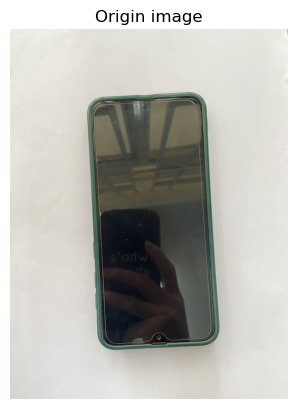

Kích thước ảnh: (839, 1661, 3)


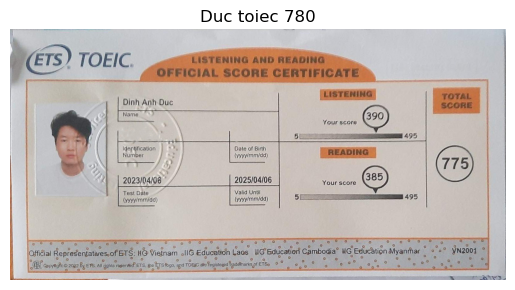

In [12]:
path = os.path.abspath(r'image/phone.jpg')
image = plt.imread(path)
show_image(image, "Origin image")

path = os.path.abspath(r'image/image.jpg')
image1=plt.imread(path)
print("Kích thước ảnh:", image1.shape)
show_image(image1,"Duc toiec 780")

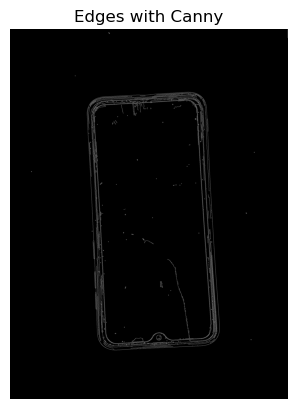

In [4]:
#bai 4.1
from skimage import color
# Tải các thư viện cần thiết
from skimage.feature import canny
# chuyển đổi ảnh thành ảnh xám
grayImage = color.rgb2gray(image)
# Áp dụng bộ lọc cạnh 
canny_edges = canny(grayImage)
# Hiển thị kết quả
show_image(canny_edges, "Edges with Canny")

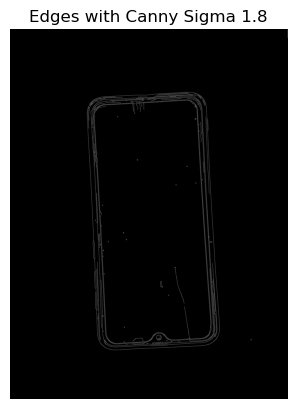

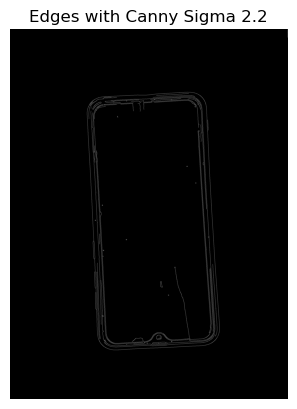

In [5]:
# Ứng dụng phát hiện cạnh với sigma =1.8
canny_edges_sigma18 = canny(grayImage, sigma=1.8)
show_image(canny_edges_sigma18, "Edges with Canny Sigma 1.8")
# Ứng dụng phát hiện cạnh với sigma =2.2
canny_edges_sigma22 = canny(grayImage, sigma=2.2)
show_image(canny_edges_sigma22, "Edges with Canny Sigma 2.2")

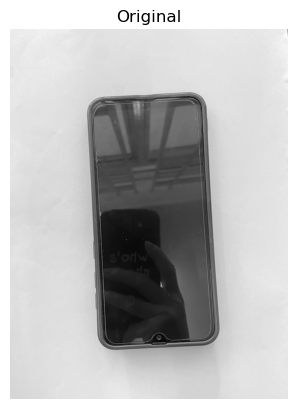

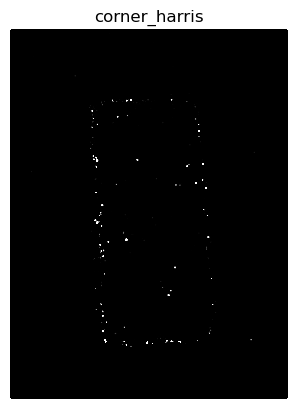

In [6]:
# Khai báo các thư viện cần thiết
from skimage.feature import corner_harris, corner_peaks


# Ứng dụng bộ lọc Harris để xác định các góc có khả năng:
measure_image = corner_harris(grayImage)

# Tìm đỉnh của các góc dựa trên đáp ứng của bộ lọc Harris 
#coords_corner_peaks = corner_peaks(corner_harris(grayImage), min_distance=50)
# Hiển thị kết quả và so sánh
show_image(grayImage, "Original")

show_image(measure_image, "corner_harris",vmin=0.00001,vmax=0.01)

#show_image(measure_image, "corner_peaks",vmin=70,vmax=120)
#show_image_with_corners(image, coords_corner_peaks)

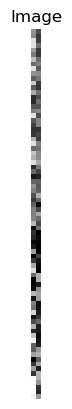

A total of 79 corners were detected.


In [7]:
# Tìm đỉnh của các góc dựa trên đáp ứng của bộ lọc Harris 
measure_image = measure_image -0.5
coords_corner_peaks = corner_peaks(measure_image, min_distance=100)
show_image(coords_corner_peaks)
print("A total of", len(coords_corner_peaks), "corners were detected.")


0.5563258501838235


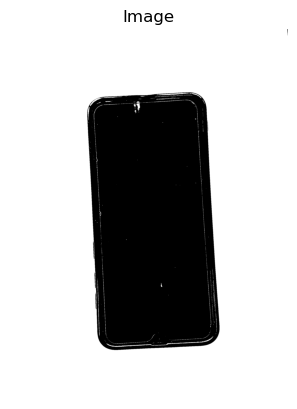

[[5.37882695 5.71699595 0.45791676 ... 0.31693027 0.41910241 0.30352095]
 [5.6678875  6.18884483 1.2988225  ... 0.64880074 0.55109128 0.34765243]
 [0.43904764 1.29397561 0.42916507 ... 0.18686766 0.11799989 0.02554893]
 ...
 [0.27259834 0.82508362 0.27381709 ... 0.36583258 1.10198358 0.36320868]
 [3.59044005 3.93856485 0.82508563 ... 1.10207501 5.25770791 4.78825921]
 [3.3788688  3.59048142 0.27293053 ... 0.36383725 4.78838129 4.50130372]]


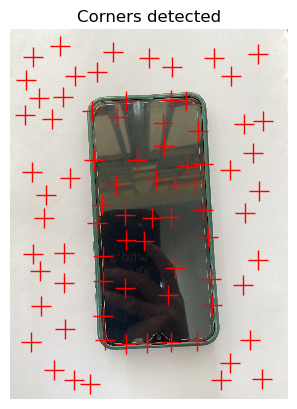

In [8]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(grayImage)
print(thresh)
grayImage_binary = grayImage > thresh
show_image(grayImage_binary)
measure_image = corner_harris(grayImage)
print(measure_image)
coords_corner_peaks = corner_peaks(measure_image, min_distance=100)
show_image_with_corners(image, coords_corner_peaks)

In [10]:
# Thay đổi tham số điều khiển min_distance và quan sát số lượng các góc có thể tìm được
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

With a min_distance set to 2, we detect a total 71482 corners in the image.


In [13]:
# Khai báo class Cascade
from skimage.feature import Cascade
from skimage import data

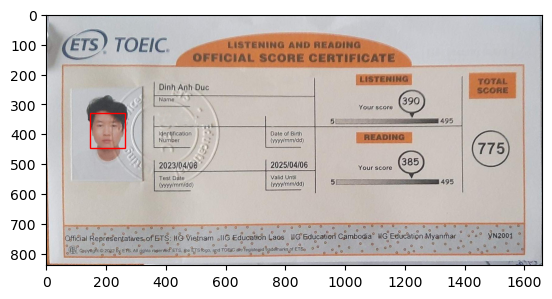

In [16]:
#Bài 4.5
trained_file = data.lbp_frontal_face_cascade_filename()

# khởi tạo đối tượng phát hiện khuôn mặt
detector = Cascade(trained_file)

# Thay đổi các tham số điều khiển giá trị lớn nhất và giá trị nhỏ nhất của khuôn mặt và đánh giá sự thay đổi
detected = detector.detect_multi_scale(img=image1,scale_factor=1.2,step_ratio=1,min_size=(10, 10),max_size=(200, 200))

# Hiển thị kết quả.
show_detected_face(image1, detected)

Kích thước ảnh: (2400, 1080, 3)


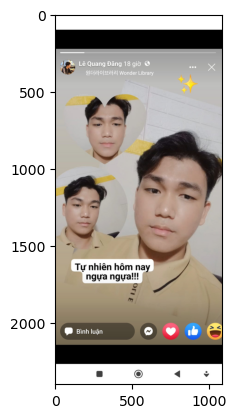

In [17]:
#Bài 4.6
import os
import matplotlib.pyplot as plt
path = os.path.abspath(r'image/tuananh.jpg')
friends_image=plt.imread(path)
print("Kích thước ảnh:", friends_image.shape)
plt.imshow(friends_image)

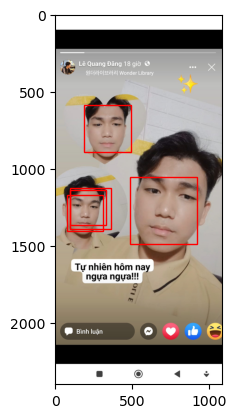

In [22]:
# Khai báo class Cascade
from skimage.feature import Cascade
from skimage import data
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()
# Initialize the detector cascade
detector = Cascade(trained_file)
# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image, scale_factor=1.2, step_ratio=1, min_size=(20, 20), max_size=(600, 600))
# Show the detected faces
show_detected_face(friends_image, detected)

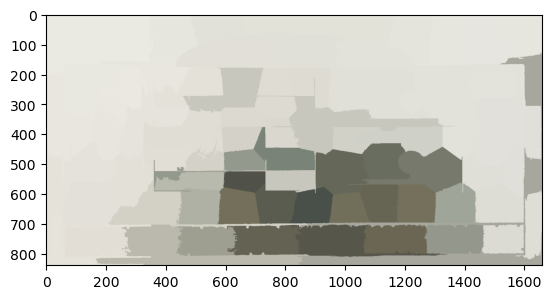

In [29]:
#Bài 4.7
from skimage.segmentation import slic
from skimage.color import label2rgb

# Tách ảnh gốc thành 100 vùng
segments = slic(image1, n_segments=100)

# Tạo ra ảnh phân đoạn bằng hàm label2rgb
segmented_image = label2rgb(segments,image, kind='avg')

# Phát hiện khuôn mặt dựa vào ảnh phân đoạn
detected = detector.detect_multi_scale(img=segmented_image, scale_factor=1.2, step_ratio=1, min_size=(10, 10), max_size=(1000, 1000))

# Hiển thị kết quả và so sánh
show_detected_face(segmented_image, detected)

In [39]:
def mergeBlurryFace(original, gaussian_image):
 # truy vấn vào toạ độ góc trên cùng bên trái của khuôn mặt
 x, y = d['r'], d['c']
 # Truy vấn và toạ độ góc dưới cùng bên phải của khuôn mặt
 width, height = d['r'] + d['width'], d['c'] + d['height']
 original[ x:width, y:height] = gaussian_image 
 # trả về ảnh đã được làm mờ
 return original
def getFace(d):
 ''' Extracts the face rectangle from the image using the
 coordinates of the detected.'''
 # X and Y starting points of the face rectangle
 x, y = d['r'], d['c']
 # The width and height of the face rectangle
 width, height = d['r'] + d['width'], d['c'] + d['height']
 # Extract the detected face
 face= image[x:width, y:height]
 return face

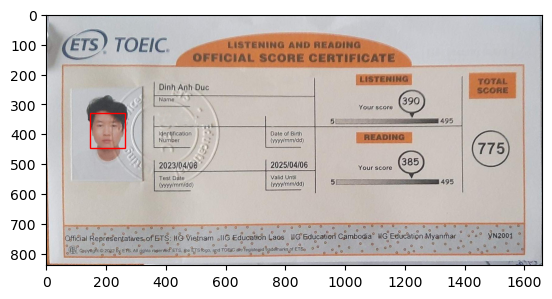

[{'r': 328, 'c': 145, 'width': 118, 'height': 118}]
float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11016\946404230.py:17: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  blurred_face = gaussian(face, multichannel=False,sigma=0.001)


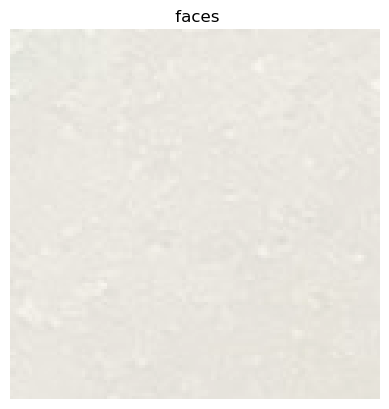

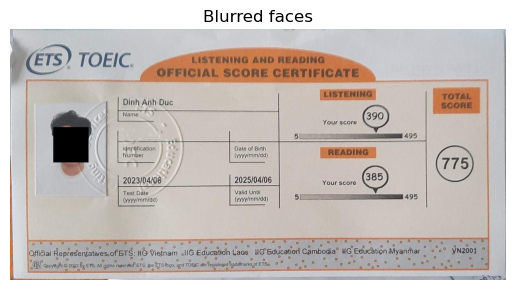

In [58]:
import numpy as np
from skimage.filters import gaussian
# Phát hiện khuôn mặt
detected = detector.detect_multi_scale(img=image1,scale_factor=1.2,step_ratio=1,min_size=(10, 10),max_size=(200, 200))

show_detected_face(image1, detected)
# Khởi tạo ảnh kết quả với ảnh gốc
resulting_image = np.copy(image1)

# Với mỗi khuôn mặt đã phát hiện
print(detected)
for d in detected:
    # Tách khuôn mặt ra khỏi ảnh gốc
    face = getFace(d)
    print(blurred_face.dtype)
    # Làm mờ khuôn mặt
    blurred_face = gaussian(face, multichannel=False,sigma=0.001)
    # Kết hợp ảnh đã được làm mờ với ảnh gốc
    resulting_image = mergeBlurryFace(resulting_image, blurred_face)
    show_image(blurred_face, " faces")

# Hiển thị ảnh kết quả
show_image(resulting_image, "Blurred faces")